# Bike Sharing Assignment

## Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Our task involves creating a model that predicts the demand for shared bikes based on the available independent variables. This model will serve as a valuable tool for the management, offering insights into how demand fluctuates with various features. The information derived can guide strategic decisions, enabling the management to align business strategies with demand levels and meet customer expectations effectively. Additionally, the model will provide valuable insights into the demand dynamics of a new market, offering a comprehensive understanding for strategic planning.

## Steps in model building

I will proceed with the following steps in constructing a Linear Regression Model:

- Step 1: Reading and Understanding of data
- Step 2: Exploratory Data Analysis
- Step 3: Data preparation
- Step 4: Model Building
- Step 5: Residual Analysis
- Step 6: Make Predictions
- Step 7: Model Evaluation

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Step 1: Reading and Understanding the data

In [2]:
# Reading the data into a dataframe

bike_data = pd.read_csv('day.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Shape of the data

bike_data.shape

(730, 16)

- The dataset comprises 730 rows.
- It includes a total of 16 variables, with one being the predictor variable.
- The target variable, denoted as "cnt," represents the number of bookings on any given day.

In [4]:
# Checking the data types of all the columns

bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### Observations:
-    No columns contain missing values.
-    Categorical variables are encoded as numerical variables, as they are represented using numeric values.

In [5]:
# Checking the standard stats of the numerical variables

num_var = ['temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt']
bike_data[num_var].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#####  Observations:
- Upon examining the 75th percentile and maximum values of all numerical variables, it appears that there are no outliers. To validate this observation, I will use boxplots for confirmation.

#### 1.1 Quality Check

In [6]:
# Missing values

bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Observation:
- There are no missing values in the data

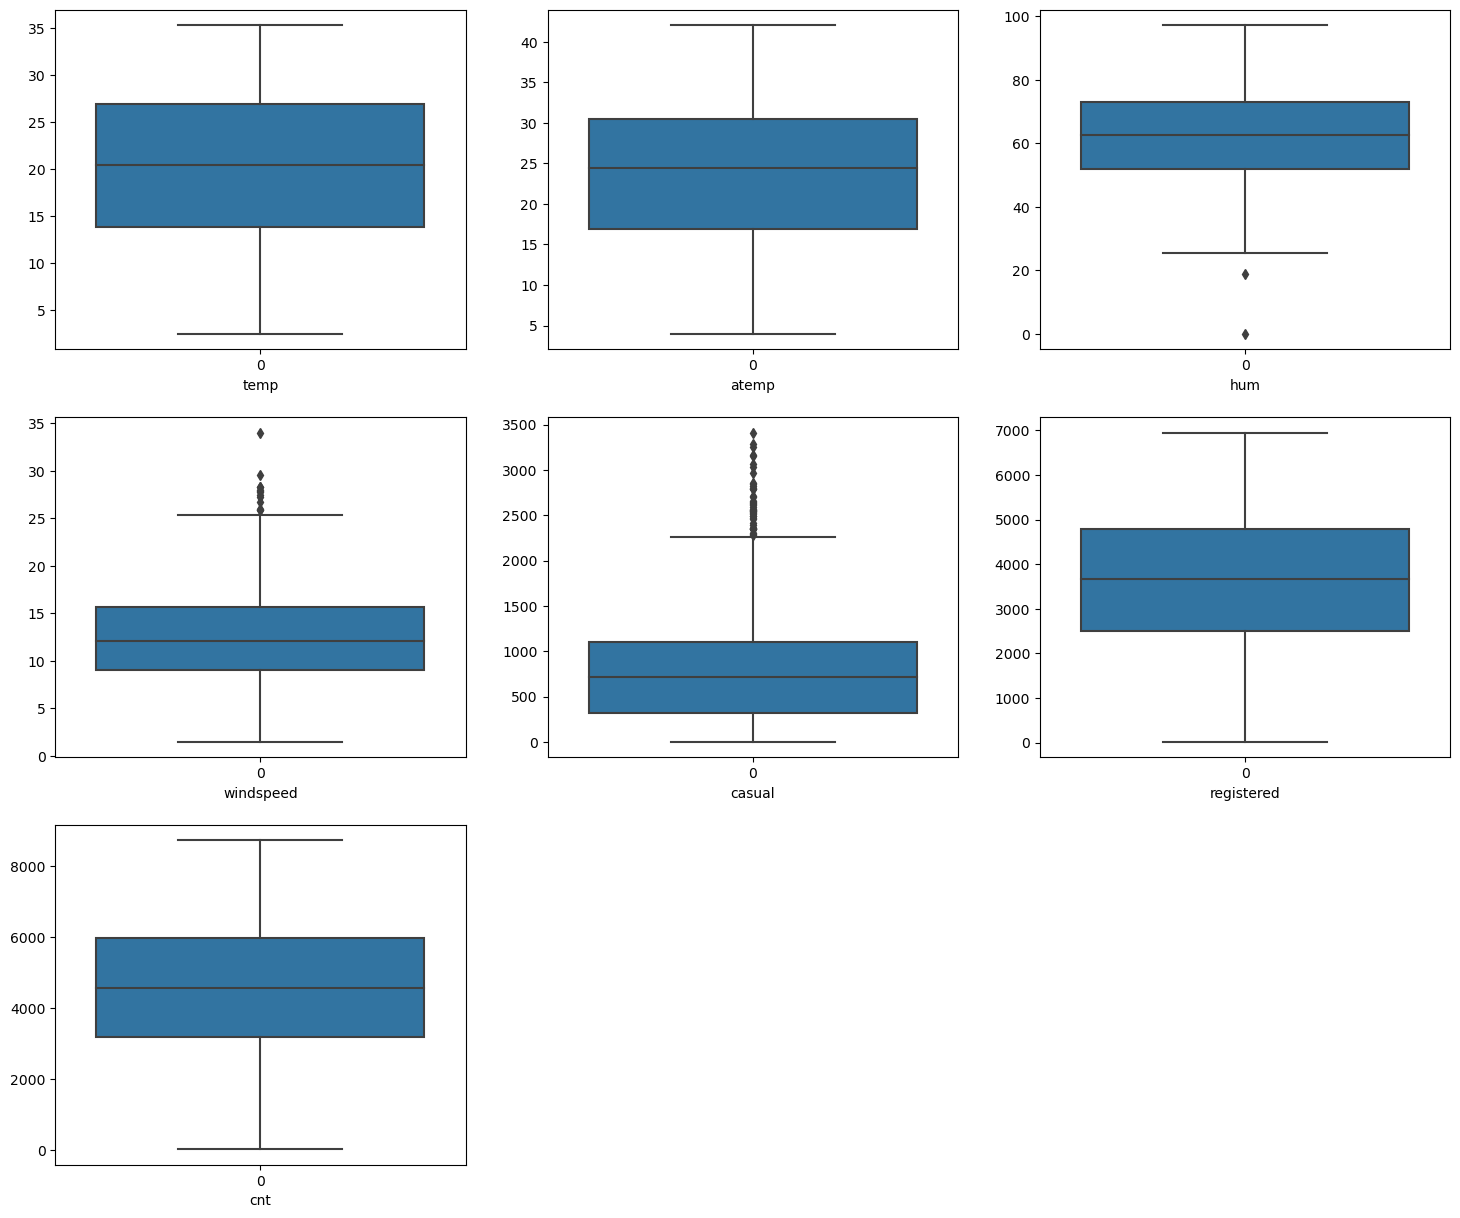

In [7]:
# Outliers

plt.figure(figsize=(18,15))  # Setting size of a figure

for ind,var in enumerate(num_var):   # loop to plot boxplot of all the numerical variables
    plt.subplot(3,3,ind+1)
    sns.boxplot(bike_data[var])
    plt.xlabel(var)
    
plt.show()

#####  Observations:
- There are no outliers present in any of the numerical columns

In [8]:
# Sanity check

bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### Observations:
- By reviewing the maximum values of all categorical variables, I have understood that their representations align with the information provided in the data dictionary..
 

### Step 2: Exploratory Data Analysis

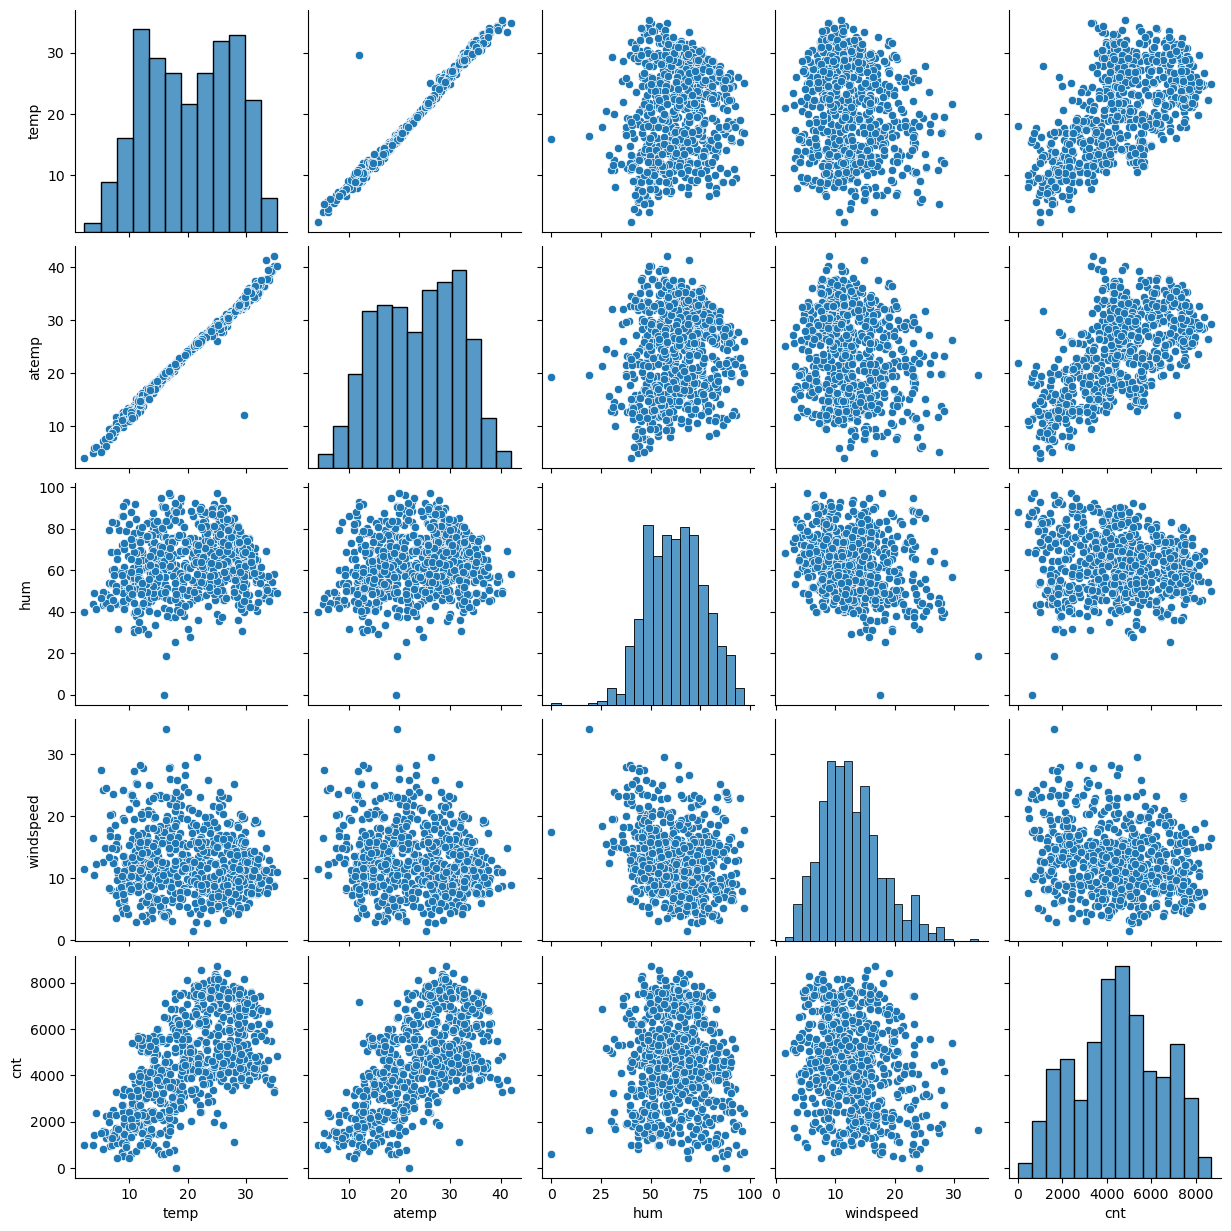

In [9]:
# Visualising continuous variables

num_var = ['temp','atemp','hum', 'windspeed','cnt']

sns.pairplot(bike_data[num_var])
plt.show()

##### Observations:
1. A clear linear relationship exists between the variables cnt and temp, as well as cnt and atemp.
2. The association between cnt and humidity, windspeed is not distinctly linear.
3. Temperature (temp) and "feels like" temperature (atemp) exhibit a linear relationship, suggesting a potential association between these two variables.

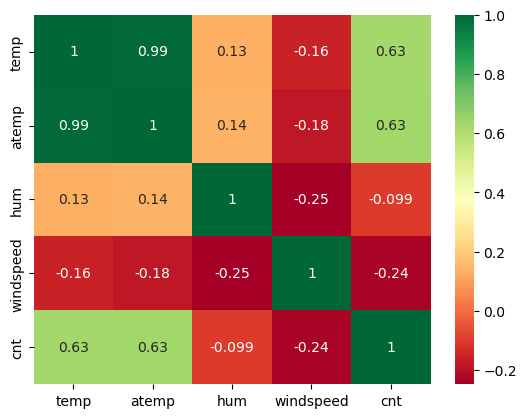

In [10]:
# Plotting heatmap of numerical variables correlation

sns.heatmap(bike_data[num_var].corr(), annot=True, cmap='RdYlGn')
plt.show()

##### Observations:
1. Highest correlation exists between atemp and temp.
2. The variable cnt shows a positive correlation with both temp and atemp, indicating that an increase in temperature or "feels like" temperature will lead to an increase in demand.
3. There is a negative correlation between cnt and humidity, as well as cnt and windspeed, implying that an increase in humidity or windspeed will result in a decrease in demand.

In [11]:
# Replacing numbers in season, weathersit,weekday,month columns for further analysis

bike_data['season'] = bike_data['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
bike_data['weathersit'] = bike_data['weathersit'].map({1:'Clear', 2:'Mist+Cloudy', 3:'Light Snow'})
bike_data['weekday'] = bike_data['weekday'].map({1: 'Wed', 2: 'Thur', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tue'})
bike_data['mnth'] = bike_data['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul', 8:'Aug', 9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

- I have choosen the following mapping based on the dteday column
    -  {1: 'Wed', 2: 'Thur', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tue'}
- Here the assumption is that Mon and Tue are holidays

In [12]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,Mon,0,Mist+Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Tue,0,Mist+Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Thur,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


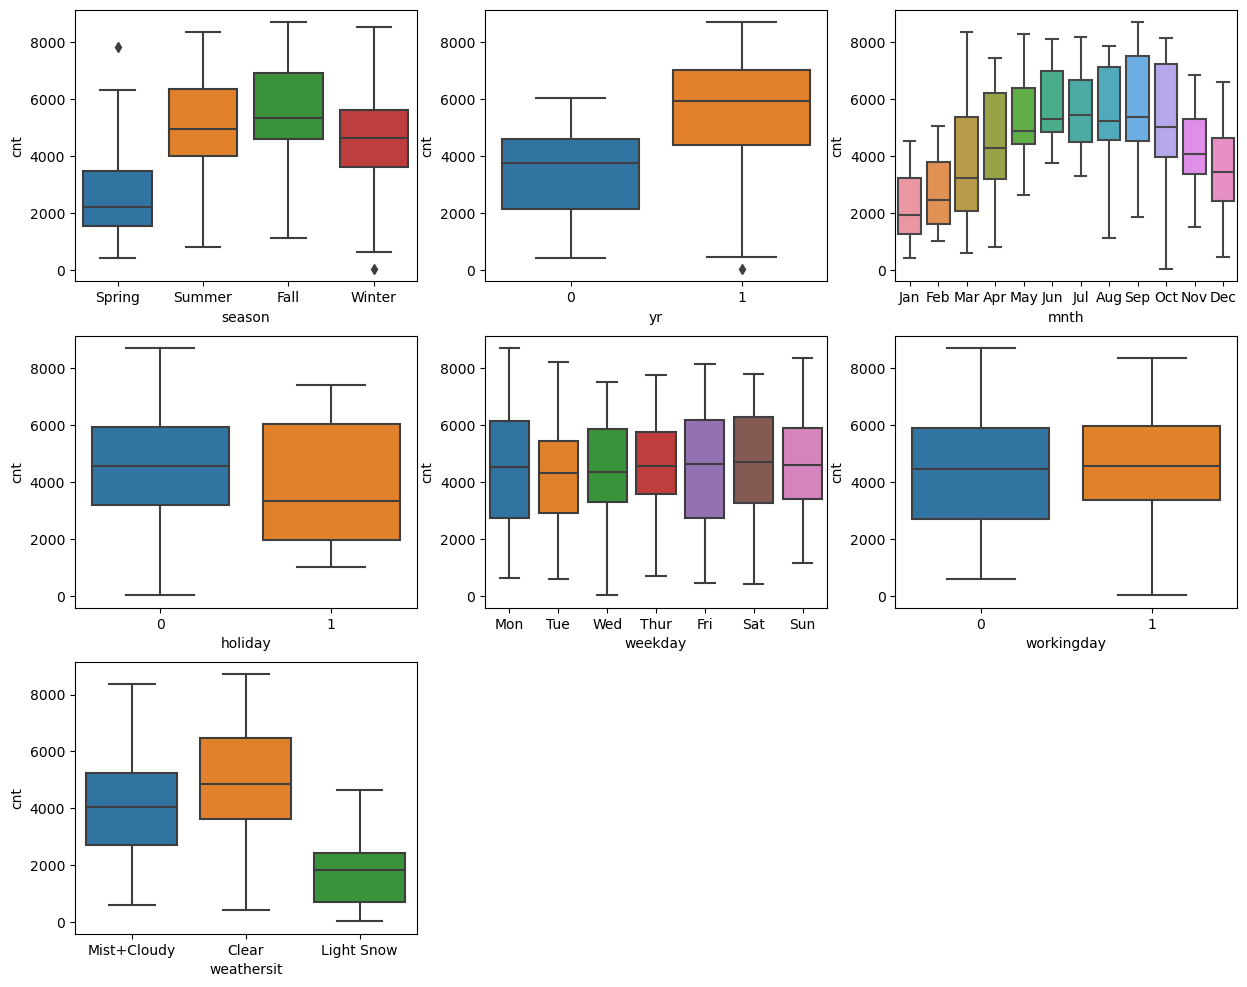

In [13]:
# Visualising Categorical Variables

cat_var = ['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit']

plt.figure(figsize=(15,12))

for i, k in enumerate(cat_var):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=k, y='cnt', data=bike_data)
plt.show()

#####  Observations:
1. The demand for bikes exhibits substantial variation across different seasons.
2. In 2019, there is a notable increase in bike demand compared to the preceding year 2018. With additional evidence, we could infer a yearly upward trend in demand.
3. arious months display distinct levels of bike demand.
4. On working days, the distribution of demand is more concentrated on the higher side compared to holidays.
5. The distribution of demand across different days of the week does not provide significant insights.
6. Bike demand is higher during clear weather compared to rainy conditions.

###  Step 3: Data Preparation for model building

#####  Assumptions:
1. The "instant" column contains index data only and is therefore not useful for predictions.
2. The "dteday" column is redundant as we already have separate columns "yr" and "mnth" representing the same data. Hence, this column is unnecessary.
3. "casual" and "registered," - "cnt" is the sum of these values, so casual and registered together will explain cnt. Hence we should not have them in the model

In [14]:
# Dropping above said columns from the dataframe

red_col = ['instant','dteday','casual','registered']   # redundant Columns
bike_data = bike_data.drop(red_col, axis=1)

In [15]:
bike_data.shape

(730, 12)

#### Dummy Variables

In [16]:
# Creating dummy variables for the below categorical columns and adding them to the dataframe

dum_var = ['season','weathersit','weekday','mnth']

for i in dum_var:
    i = pd.get_dummies(bike_data[i], drop_first=True, dtype=int)
    bike_data = pd.concat([bike_data, i], axis=1)
    
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Spring,0,Jan,0,Mon,0,Mist+Cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,Spring,0,Jan,0,Tue,0,Mist+Cloudy,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,Spring,0,Jan,0,Thur,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


In [17]:
bike_data.shape

(730, 34)

- Number of columns in the dataframe have been increased to 34 columns because of dummy variables creation

In [18]:
# As we have created a dummy variables, we can delete the above categorical variables as they are not needed for model building

bike_data = bike_data.drop(dum_var, axis=1)
bike_data.shape

(730, 30)

In [19]:
# As there is a high correlation between temp and atemp , i will drop one of the two columns. I am retaining atemp variable

bike_data = bike_data.drop('temp', axis=1)
bike_data.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


##### Splitting the data into train and test

In [20]:
# importing train_test_split library

import sklearn
from sklearn.model_selection import train_test_split

In [21]:
# splitting the entire data into 70% train data and 30% test data

df_train, df_test = train_test_split(bike_data, train_size=0.7, test_size=0.3, random_state=100)

# Random state is specified as we need to get the same trian and test sets

print('shape of train data is', df_train.shape)
print('shape of test data is', df_test.shape)

shape of train data is (510, 29)
shape of test data is (219, 29)


##### Rescaling using Normalisation technique

In [22]:
bike_data.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


##### Observations:
- atemp, hum, windspeed and cnt varibles have values at very different scale compared to the other varibles. Hence i will do rescaling to intrepret the final equation easily

In [23]:
# Import minmaxsclare method from sklearn

from sklearn.preprocessing import MinMaxScaler

In [24]:
# 1.  Instiatite the object

scaler = MinMaxScaler()

# Create a list of numeric Variables

num_var = ['atemp', 'hum', 'windspeed', 'cnt']

# 2.  Fit on the data
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df_train[num_var].describe()

,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.512989,0.650369,0.320768,0.513620
std,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000
25%,0.332086,0.538643,0.199179,0.356420
50%,0.526811,0.653714,0.296763,0.518638
75%,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


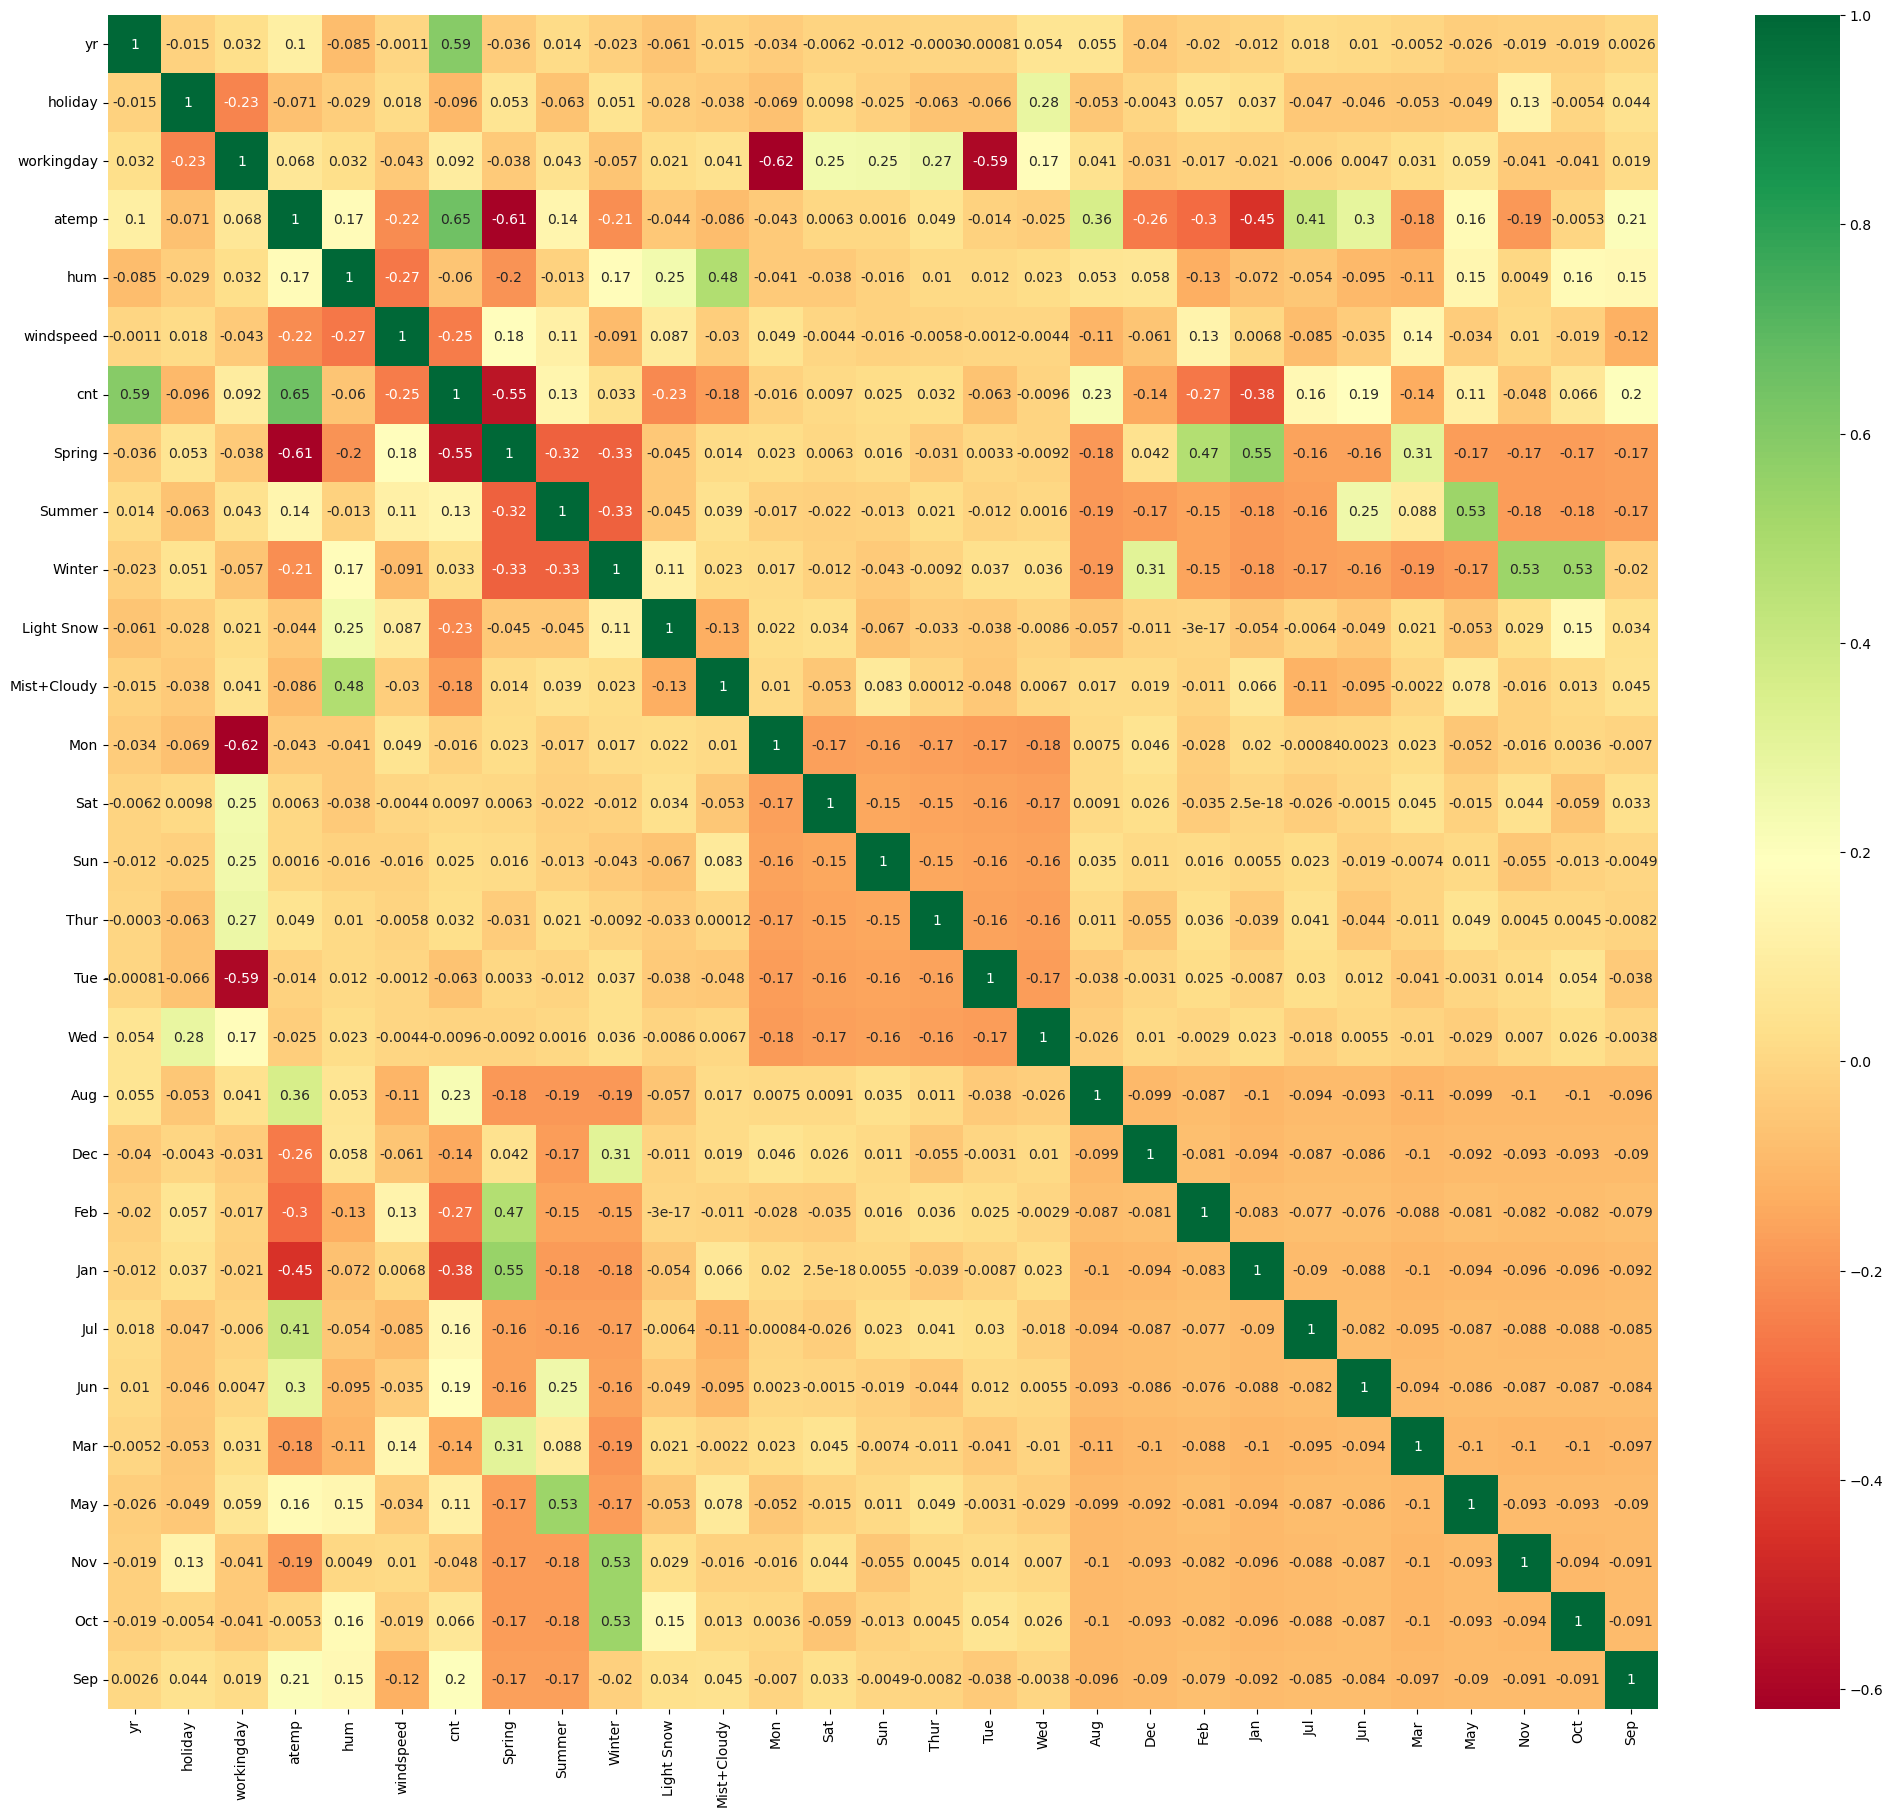

In [26]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 22))
sns.heatmap(df_train.corr(), annot = True, cmap='RdYlGn')
plt.show()

##### Observations:
- All the numerical columns now have max value of 1

### Step 4: Model Building

In [27]:
# Dividing into X and Y sets for the model building

y_train = df_train.pop('cnt')
X_train = df_train

### Approach:
- I will initially construct a model using all available columns and assess the metrics. 
- Following that, I will adopt an automated approach, specifically Recursive Feature Elimination (RFE), to identify the top-n features. 
- In the subsequent step, I will build a model using only those selected features. 
- Finally, I will fine-tune the model by examining p-values, F-statistics, R-squared values, and Variance Inflation Factor (VIF).

####  Linear Regression Model - 1 using all the features(variables)

In [28]:
# importing stats model library - This is to get detailed metrics

import statsmodels
import statsmodels.api as sm

In [29]:
X_train_lm_1 = sm.add_constant(X_train)
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,Spring,Summer,Winter,Light Snow,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Create and fit first model 

lm_1 = sm.OLS(y_train,X_train_lm_1).fit()

In [31]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          4.12e-180
Time:                        18:34:08   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     482   BIC:                            -873.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2584      0.035      7.320      

##### Observations:
- The R-squared value is 85.1%, and the Adjusted R-squared value is nearly identical. This indicates that the model successfully explains 85% of the variance in the target variable, cnt.
- However, numerous coefficients have p-values exceeding the significance level, suggesting that the model is not deemed effective.

In [32]:
# Let's Check VIF values to confirm the above satement

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
X_train_1 = X_train_lm_1.drop('const', axis=1)
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,84.98
11,Mon,19.34
15,Tue,18.01
6,Spring,10.74
8,Winter,9.47
7,Summer,8.23
25,Nov,6.77
26,Oct,6.59
17,Aug,6.24
3,atemp,5.95


#####  Observations:
- Many features have very high VIF value which is greater than 5. So, I will use RFE method to select top features

###  Reccursive Feature Elimination

In [34]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
X_train.shape

(510, 28)

In the final dataframe we have a total of 29 columns. SO, I will use RFE and select top 15 features for model building

In [36]:
# Running RFE with the output number of the variable equal to 20

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Light Snow', True, 1),
 ('Mist+Cloudy', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 8),
 ('Sun', False, 6),
 ('Thur', False, 5),
 ('Tue', False, 3),
 ('Wed', False, 4),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 2),
 ('Mar', False, 9),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 7),
 ('Sep', True, 1)]

In [38]:
# top 20 features are 

top_20_fea = X_train.columns[rfe.support_]
top_20_fea

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Light Snow', 'Mist+Cloudy', 'Mon', 'Aug', 'Dec',
       'Feb', 'Jan', 'Jul', 'May', 'Nov', 'Sep'],
      dtype='object')

In [39]:
# Excluded features are

X_train.columns[~rfe.support_]

Index(['Sat', 'Sun', 'Thur', 'Tue', 'Wed', 'Jun', 'Mar', 'Oct'], dtype='object')

###  Linear Regression Model - 2 (Using top 20 features)

In [40]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[top_20_fea]

In [41]:
X_train_lm_2 = sm.add_constant(X_train_rfe)
X_train_lm_2.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,Spring,Summer,Winter,...,Mist+Cloudy,Mon,Aug,Dec,Feb,Jan,Jul,May,Nov,Sep
653,1.0,1,0,1,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,0,0,0,0,0
576,1.0,1,0,1,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1.0,1,0,0,0.438975,0.640189,0.255342,1,0,0,...,1,1,0,0,0,0,0,0,0,0
728,1.0,1,0,0,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0,0.391735,0.504508,0.188475,0,1,0,...,1,1,0,0,0,0,0,0,0,0


In [42]:
# Create and fit first model 

lm_2 = sm.OLS(y_train,X_train_lm_2).fit()

In [43]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     138.0
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          1.89e-186
Time:                        18:34:14   Log-Likelihood:                 521.45
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     489   BIC:                            -912.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3119      0.040      7.730      

##### Observations:
- There is no significane reduction in R-squared
- There are still many columns with high p-value.So, I will use RFE method again and select top 15 features

###  Linear Regression Model - 3 (Using top 15 features)

In [44]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train_rfe, y_train)

rfe = RFE(lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train_rfe, y_train)

In [45]:
list(zip(X_train_rfe.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 5),
 ('Winter', True, 1),
 ('Light Snow', True, 1),
 ('Mist+Cloudy', True, 1),
 ('Mon', True, 1),
 ('Aug', False, 6),
 ('Dec', True, 1),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Sep', True, 1)]

In [46]:
# top 15 features are 

top_15_fea = X_train_rfe.columns[rfe.support_]
top_15_fea

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'Spring', 'Winter',
       'Light Snow', 'Mist+Cloudy', 'Mon', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep'],
      dtype='object')

In [47]:
# Excluded features are

X_train_rfe.columns[~rfe.support_]

Index(['workingday', 'Summer', 'Aug', 'Feb', 'May'], dtype='object')

In [48]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[top_15_fea]

In [49]:
X_train_lm_3 = sm.add_constant(X_train_rfe)
X_train_lm_3.head()

,const,yr,holiday,atemp,hum,windspeed,Spring,Winter,Light Snow,Mist+Cloudy,Mon,Dec,Jan,Jul,Nov,Sep
653,1.0,1,0,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0
576,1.0,1,0,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0
426,1.0,1,0,0.438975,0.640189,0.255342,1,0,0,1,1,0,0,0,0,0
728,1.0,1,0,0.200348,0.498067,0.663106,1,0,0,0,0,1,0,0,0,0
482,1.0,1,0,0.391735,0.504508,0.188475,0,0,0,1,1,0,0,0,0,0


In [50]:
# Create and fit a first model 

lm_3 = sm.OLS(y_train,X_train_lm_3).fit()

In [51]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          9.67e-187
Time:                        18:34:15   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3662      0.032     11.425      

In [52]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
X_train_1 = X_train_lm_3.drop('const', axis=1)
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.08
2,atemp,16.88
4,windspeed,4.03
6,Winter,2.93
5,Spring,2.89
8,Mist+Cloudy,2.26
0,yr,2.06
13,Nov,1.82
11,Jan,1.75
10,Dec,1.54


#####  Observations:
1. No significant change in R-squared
2. Mon has high p-value
3. Humidity and atemp has high VIF values
4. Let's drop the Mon variable from the model and build the model again

###  Linear Regression Model - 4 (After dropping Mon feature)

In [53]:
X_train_rfe = X_train_rfe.drop('Mon', axis=1)

In [54]:
X_train_lm_4 = sm.add_constant(X_train_rfe)
X_train_lm_4.head()

,const,yr,holiday,atemp,hum,windspeed,Spring,Winter,Light Snow,Mist+Cloudy,Dec,Jan,Jul,Nov,Sep
653,1.0,1,0,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0
576,1.0,1,0,0.766351,0.725633,0.264686,0,0,0,0,0,0,1,0,0
426,1.0,1,0,0.438975,0.640189,0.255342,1,0,0,1,0,0,0,0,0
728,1.0,1,0,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0
482,1.0,1,0,0.391735,0.504508,0.188475,0,0,0,1,0,0,0,0,0


In [55]:
# Create and fit a first model 

lm_4 = sm.OLS(y_train,X_train_lm_4).fit()

print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.1
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          2.58e-187
Time:                        18:34:16   Log-Likelihood:                 507.48
No. Observations:                 510   AIC:                            -985.0
Df Residuals:                     495   BIC:                            -921.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3704      0.032     11.578      

In [56]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
X_train_1 = X_train_lm_4.drop('const', axis=1)
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.08
2,atemp,16.83
4,windspeed,4.00
6,Winter,2.93
5,Spring,2.89
8,Mist+Cloudy,2.26
0,yr,2.06
12,Nov,1.82
10,Jan,1.75
9,Dec,1.54


#####  Observations:
1. No significant change in R-squared value
2. All the coefficients values are less than 0.05
3. Hum and atemp still have high VIF values. As this is mutlicollinearity issue, let's drop Hum first

###  Linear Regression Model - 5 (After dropping Humidity feature)

In [57]:
X_train_rfe = X_train_rfe.drop('hum', axis=1)

In [58]:
X_train_lm_5 = sm.add_constant(X_train_rfe)
X_train_lm_5.head()

,const,yr,holiday,atemp,windspeed,Spring,Winter,Light Snow,Mist+Cloudy,Dec,Jan,Jul,Nov,Sep
653,1.0,1,0,0.501133,0.300794,0,1,0,0,0,0,0,0,0
576,1.0,1,0,0.766351,0.264686,0,0,0,0,0,0,1,0,0
426,1.0,1,0,0.438975,0.255342,1,0,0,1,0,0,0,0,0
728,1.0,1,0,0.200348,0.663106,1,0,0,0,1,0,0,0,0
482,1.0,1,0,0.391735,0.188475,0,0,0,1,0,0,0,0,0


In [59]:
# Create and fit a first model 

lm_5 = sm.OLS(y_train,X_train_lm_5).fit()

print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          3.95e-185
Time:                        18:34:16   Log-Likelihood:                 499.52
No. Observations:                 510   AIC:                            -971.0
Df Residuals:                     496   BIC:                            -911.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2931      0.026     11.396      

In [60]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
X_train_1 = X_train_lm_5.drop('const', axis=1)
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.57
3,windspeed,3.95
5,Winter,2.55
4,Spring,2.35
0,yr,2.06
11,Nov,1.80
9,Jan,1.65
7,Mist+Cloudy,1.53
8,Dec,1.46
10,Jul,1.35


##### Observations:
- R-Squared and Adjusted R-squared values are very close
- All the coeeficients have p values less than 0.05
- The VIF of all the independent variables is less than 5.
- Based on these observations, it seems we have developed a decent model. However, for confirmation, let's assess the impact of dropping the "holiday" variable and introducing the "workingday" feature.

###  Linear Regression Model - 6 (Let's drop holiday feature and add working day feature)

In [61]:
X_train_rfe_fc = X_train_rfe.drop('holiday', axis=1)

In [62]:
X_train_rfe_1 = pd.concat([X_train_rfe_fc, X_train[['workingday']]], axis=1)

In [63]:
X_train_lm_6 = sm.add_constant(X_train_rfe_1)
X_train_lm_6.head()

,const,yr,atemp,windspeed,Spring,Winter,Light Snow,Mist+Cloudy,Dec,Jan,Jul,Nov,Sep,workingday
653,1.0,1,0.501133,0.300794,0,1,0,0,0,0,0,0,0,1
576,1.0,1,0.766351,0.264686,0,0,0,0,0,0,1,0,0,1
426,1.0,1,0.438975,0.255342,1,0,0,1,0,0,0,0,0,0
728,1.0,1,0.200348,0.663106,1,0,0,0,1,0,0,0,0,0
482,1.0,1,0.391735,0.188475,0,0,0,1,0,0,0,0,0,0


In [64]:
# Create and fit a first model 

lm_6 = sm.OLS(y_train,X_train_lm_6).fit()

print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.3
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          4.06e-184
Time:                        18:34:17   Log-Likelihood:                 497.12
No. Observations:                 510   AIC:                            -966.2
Df Residuals:                     496   BIC:                            -906.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2775      0.027     10.468      

In [65]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
X_train_1 = X_train_lm_6.drop('const', axis=1)
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,5.63
2,windspeed,3.98
12,workingday,2.98
4,Winter,2.55
3,Spring,2.39
0,yr,2.06
10,Nov,1.77
8,Jan,1.65
6,Mist+Cloudy,1.54
7,Dec,1.46


##### Conclusion:
- Negligeble change in the R-squred value
- All the coefficients are significant
- VIF of the atemp feature is slightly more than 5
- Althoug the above model is looking as a decent model, I will stick with Model No 5 because the coefficient magnitude of holiday feature is greater than working day

In [66]:
# Linear Regression Model 5 - This is the final model I am considering

print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          3.95e-185
Time:                        18:34:18   Log-Likelihood:                 499.52
No. Observations:                 510   AIC:                            -971.0
Df Residuals:                     496   BIC:                            -911.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2931      0.026     11.396      

###  Step 5: Residual Analysis of the train data

One of the assumptions in the Linear Regression Model is that, Error terms are normally distributed. Let's validate this assumption

In [67]:
y_train_pred = lm_5.predict(X_train_lm_5)

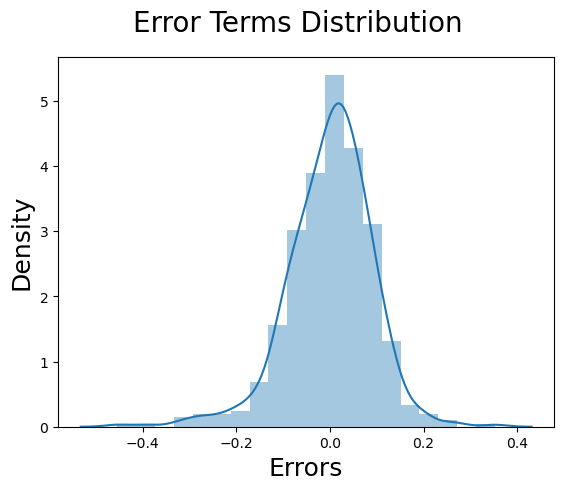

In [68]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms Distribution', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)        
plt.ylabel('Density', fontsize = 18)       
plt.show()

#####  Error terms are normally distributed with mean equal to Zero

###  Step 6: Make Predictions

In [69]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [70]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yr           219 non-null    int64  
 1   holiday      219 non-null    int64  
 2   workingday   219 non-null    int64  
 3   atemp        219 non-null    float64
 4   hum          219 non-null    float64
 5   windspeed    219 non-null    float64
 6   cnt          219 non-null    int64  
 7   Spring       219 non-null    int32  
 8   Summer       219 non-null    int32  
 9   Winter       219 non-null    int32  
 10  Light Snow   219 non-null    int32  
 11  Mist+Cloudy  219 non-null    int32  
 12  Mon          219 non-null    int32  
 13  Sat          219 non-null    int32  
 14  Sun          219 non-null    int32  
 15  Thur         219 non-null    int32  
 16  Tue          219 non-null    int32  
 17  Wed          219 non-null    int32  
 18  Aug          219 non-null    int32  
 19  Dec         

#### Rescaling on Test Data

In [71]:
num_var

['atemp', 'hum', 'windspeed', 'cnt']

In [72]:
# Transforming the numerical variables using the normalisation method, which was learnt of train data

df_test[num_var] = scaler.transform(df_test[num_var])
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [73]:
# Checking Stats of the numerical columns of the test data

df_test[num_var].describe()

,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000
mean,0.532991,0.638508,0.313350,0.520592
std,0.217888,0.148974,0.159947,0.218435
min,0.025950,0.261915,-0.042808,0.048205
25%,0.344751,0.527265,0.198517,0.377531
50%,0.549198,0.627737,0.299459,0.524275
75%,0.714132,0.743928,0.403048,0.672745
max,0.980934,1.002146,0.807474,0.963300


#### Dividing into X_test, y_test

In [74]:
y_test = df_test.pop('cnt')
X_test = df_test

In [75]:
# List of features available in the final model

final_fea = X_train_rfe.columns
final_fea

Index(['yr', 'holiday', 'atemp', 'windspeed', 'Spring', 'Winter', 'Light Snow',
       'Mist+Cloudy', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep'],
      dtype='object')

In [76]:
# Adding a constant variable to test dataframe

X_test_lm_5 = sm.add_constant(X_test[final_fea])
X_test_lm_5.head()

,const,yr,holiday,atemp,windspeed,Spring,Winter,Light Snow,Mist+Cloudy,Dec,Jan,Jul,Nov,Sep
184,1.0,0,1,0.769660,0.084219,0,0,0,1,0,0,1,0,0
535,1.0,1,0,0.842587,0.153728,0,0,0,0,0,0,0,0,0
299,1.0,0,0,0.496145,0.334206,0,1,0,1,0,0,0,0,0
221,1.0,0,0,0.795343,0.339570,0,0,0,0,0,0,0,0,0
152,1.0,0,0,0.741471,0.537414,0,0,0,0,0,0,0,0,0


In [77]:
# predicting the cnt values using fifth model

y_test_pred = lm_5.predict(X_test_lm_5)

### Step 7: Model Evaluation

####  R-Squared value

In [78]:
from sklearn.metrics import r2_score

In [79]:
print('R-Squared value on test data is :', r2_score(y_test, y_test_pred))
print('R-Squared value on train data is :', r2_score(y_train, y_train_pred))

R-Squared value on test data is : 0.8179669424739718
R-Squared value on train data is : 0.8359991965394293


- R-Squared values are pretty close, hence we can conclude it is a pretty good model

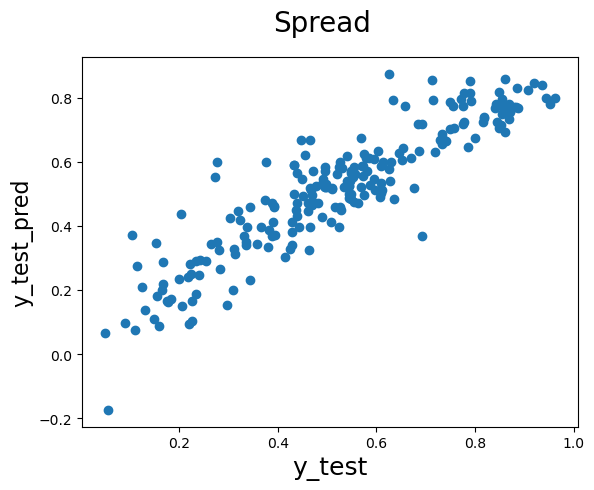

In [80]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('Spread', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16)  

plt.show()

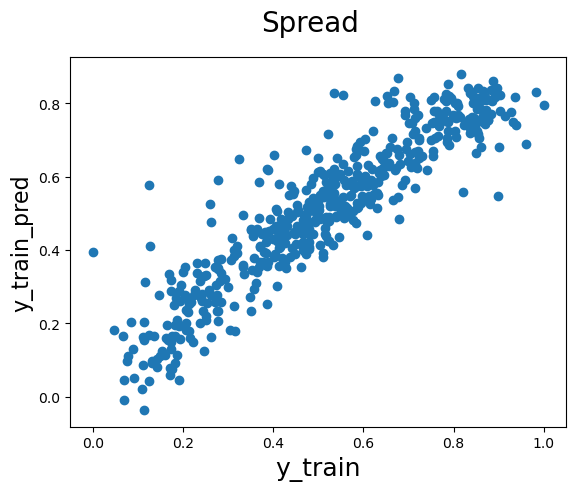

In [81]:
# Plotting y_train and y_train_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('Spread', fontsize = 20)             
plt.xlabel('y_train', fontsize = 18)                          
plt.ylabel('y_train_pred', fontsize = 16)  

plt.show()

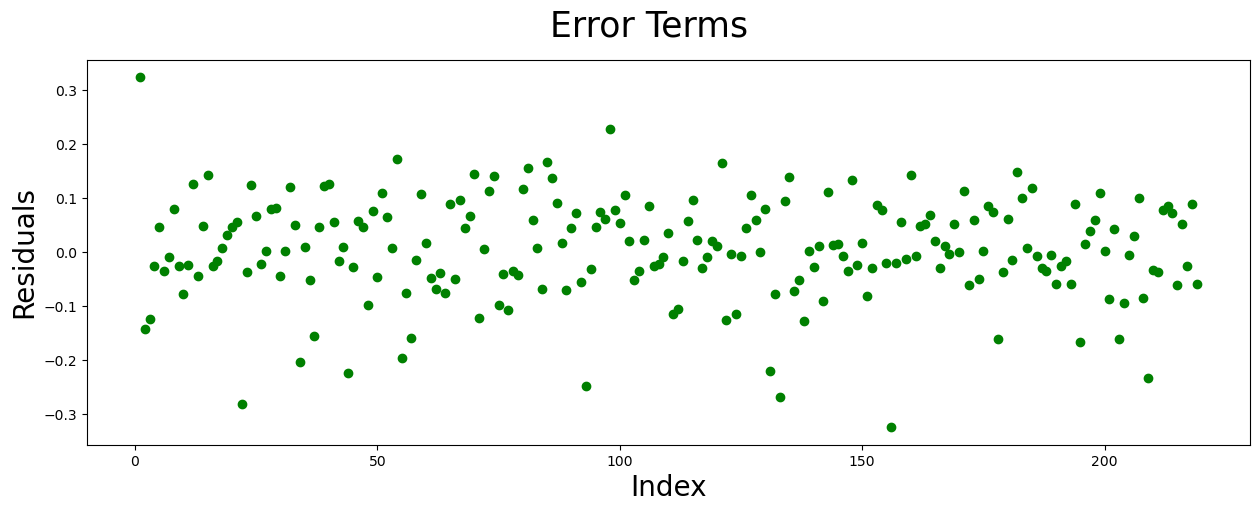

In [82]:
# Error terms distrubution on test data

ind = [i for i in range(1,220,1)]
fig = plt.figure(figsize=(15,5))
plt.plot(ind, y_test-y_test_pred, color="green", marker='o', linewidth=2, linestyle="")
fig.suptitle('Error Terms', fontsize=25)              
plt.xlabel('Index', fontsize=20)                     
plt.ylabel('Residuals', fontsize=20)

plt.show()

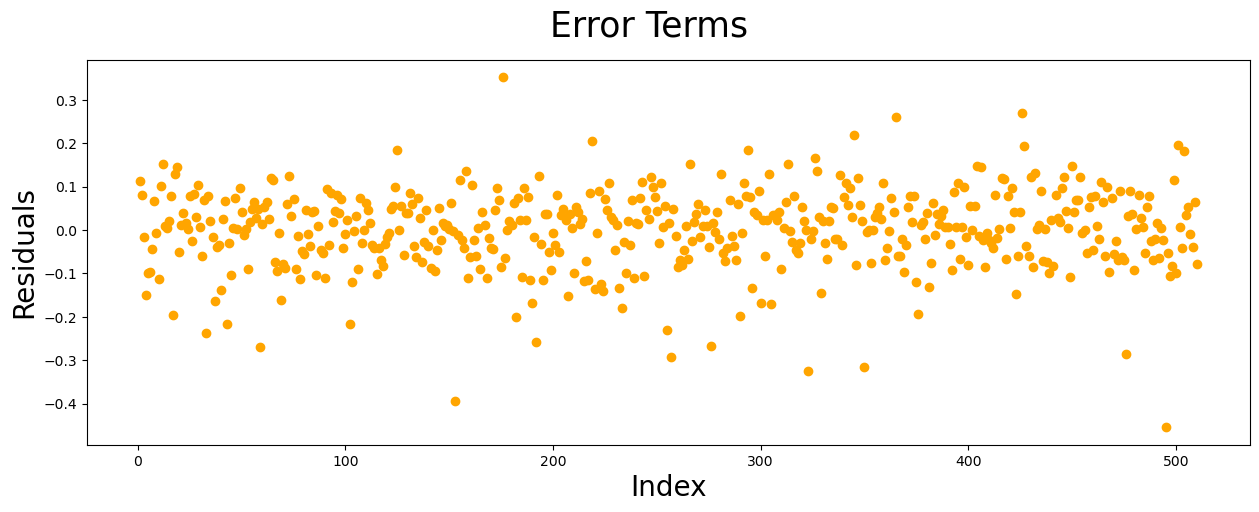

In [83]:
# Error terms distrubution on train data

ind = [i for i in range(1,511,1)]
fig = plt.figure(figsize=(15,5))
plt.plot(ind, y_train-y_train_pred, color="orange", marker='o', linewidth=2, linestyle="")
fig.suptitle('Error Terms', fontsize=25)              
plt.xlabel('Index', fontsize=20)                   
plt.ylabel('Residuals', fontsize=20)

plt.show()

#####  Observations:

- Error terms are clearly randomly distibuted in both test and train data and there is no visible pattern

## Final Linear Regression Equation

<font color=brown> `cnt` = 0.2931 + (0.4117 * `atemp`) + (0.2357 * `yr`) + (0.058 * `Winter`) + (0.0557 * `Sep`) - (0.0501 * `Nov`) - (0.0531 * `Dec`) - (0.0562 * `Jan`) - (0.0598 * `Jul`) - (0.0881 * `Mist+cloudy`) - (0.0881 * `holiday`) - (0.1096 * `Spring`) - (0.1418 * `Windspeed`) - (0.2912 * `Light Snow`)

### Interpretation

- atemp, yr, winter and sep have positive coefficients which indicates increase in these values will result in increase of demand for bikes
- atemp is the most significant predictor of all the variables present
- Increase in windspeed and snow will reduce the demand for the bike sharing
- During Nov, Dec,Jan and Jul there can be reduced demand for bikes
- Holiday has negative coefficent idicates people usually not prefere bike sharing during holidays

- <font color=green>__atemp, yr, light snow and windspeed are the top four predictors of cnt variable__

### Suggestions
- The company can strategically enhance bike availability by aligning with specific weather and environmental conditions:
    - During periods of elevated temperatures, there tends to be increased demand for bikes, possibly due to favorable weather conditions for outdoor activities
    -  Focusing on maintaining a larger fleet during clear weather allows the company to cater to the surge in demand and capitalize on optimal riding conditions.
   -  Lower windspeed is associated with more pleasant and comfortable biking experiences
   - Bike rentals see a decrease during holidays, indicating heightened demand on working days, especially from commuters choosing bikes for transportation
   - As there appears to be a yearly increase in demand, the company can strategically expand its bike inventory to capitalize on this growing demand.